**Practical 3**

**Aim:** To build and evaluate a Decision Tree Classifier model for credit risk prediction in banking using various performance metrics
 including confusion matrix, accuracy, precision, recall, and AUC score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bankloan = pd.read_csv("/content/BANK LOAN.csv")

In [ ]:
bankloan

,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER
0,1,3,17,12,9.3,11.36,5.01,1
1,2,1,10,6,17.3,1.36,4.00,0
2,3,2,15,14,5.5,0.86,2.17,0
3,4,3,15,14,2.9,2.66,0.82,0
4,5,1,2,0,17.3,1.79,3.06,1
...,...,...,...,...,...,...,...,...
695,696,2,6,15,4.6,0.26,0.98,1
696,697,1,6,4,11.5,0.37,2.05,0
697,698,2,15,3,7.6,0.49,1.94,0
698,699,3,19,22,8.4,2.30,4.17,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
bankloan1 = bankloan.drop(['SN'],axis =1)
bankloan1['AGE'] = bankloan1["AGE"].astype('category')
bankloan2 = pd.get_dummies(bankloan1)
bankloan2.head()

,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,AGE_1,AGE_2,AGE_3
0,17,12,9.3,11.36,5.01,1,False,False,True
1,10,6,17.3,1.36,4.00,0,True,False,False
2,15,14,5.5,0.86,2.17,0,False,True,False
3,15,14,2.9,2.66,0.82,0,False,False,True
4,2,0,17.3,1.79,3.06,1,True,False,False


In [ ]:
x = bankloan2.loc[:,bankloan2.columns != 'DEFAULTER']
y = bankloan2.loc[:,'DEFAULTER']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 999)

In [ ]:
# Classification Tree using Information Gain
dtc1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split= int(len(x_train)*.10))
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=49)

In [ ]:
y_pred = dtc1.predict(x_test)
y_pred_probs = dtc1.predict_proba(x_test)

In [ ]:
cutoff = 0.3
pred_test = np.where(y_pred_probs[:,1]>cutoff,1,0)
pred_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
confusion_matrix(y_test,pred_test, labels=[0,1])

array([[107,  50],
       [ 14,  39]])

In [ ]:
accuracy_score(y_test, pred_test)

0.6952380952380952

In [ ]:
precision_score(y_test, pred_test)

0.43820224719101125

In [ ]:
recall_score(y_test, pred_test)

0.7358490566037735

In [ ]:
auc = roc_auc_score(y_test, y_pred_probs[:,1])
print('AUC: %.3f' % auc)

AUC: 0.720


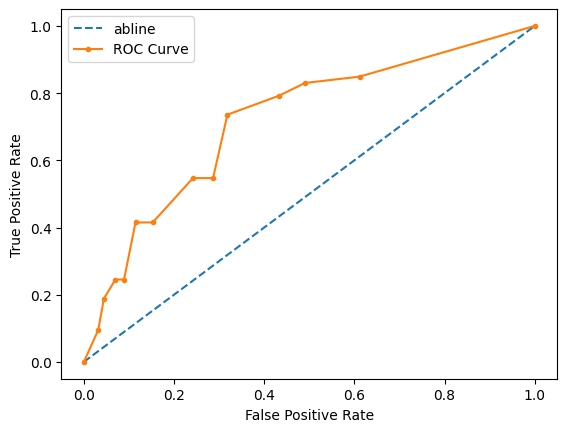

In [ ]:
#Area under ROC Curve
DTfpr, DTtpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
abline_probs = [0 for _ in range(len(y_test))]
abline_auc = roc_auc_score(y_test, abline_probs)
abline_fpr, abline_tpr, _ = roc_curve(y_test, abline_probs)
plt.plot(abline_fpr, abline_tpr, linestyle='--', label='abline')
plt.plot(DTfpr, DTtpr, marker='.', label='ROC Curve')
plt,plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

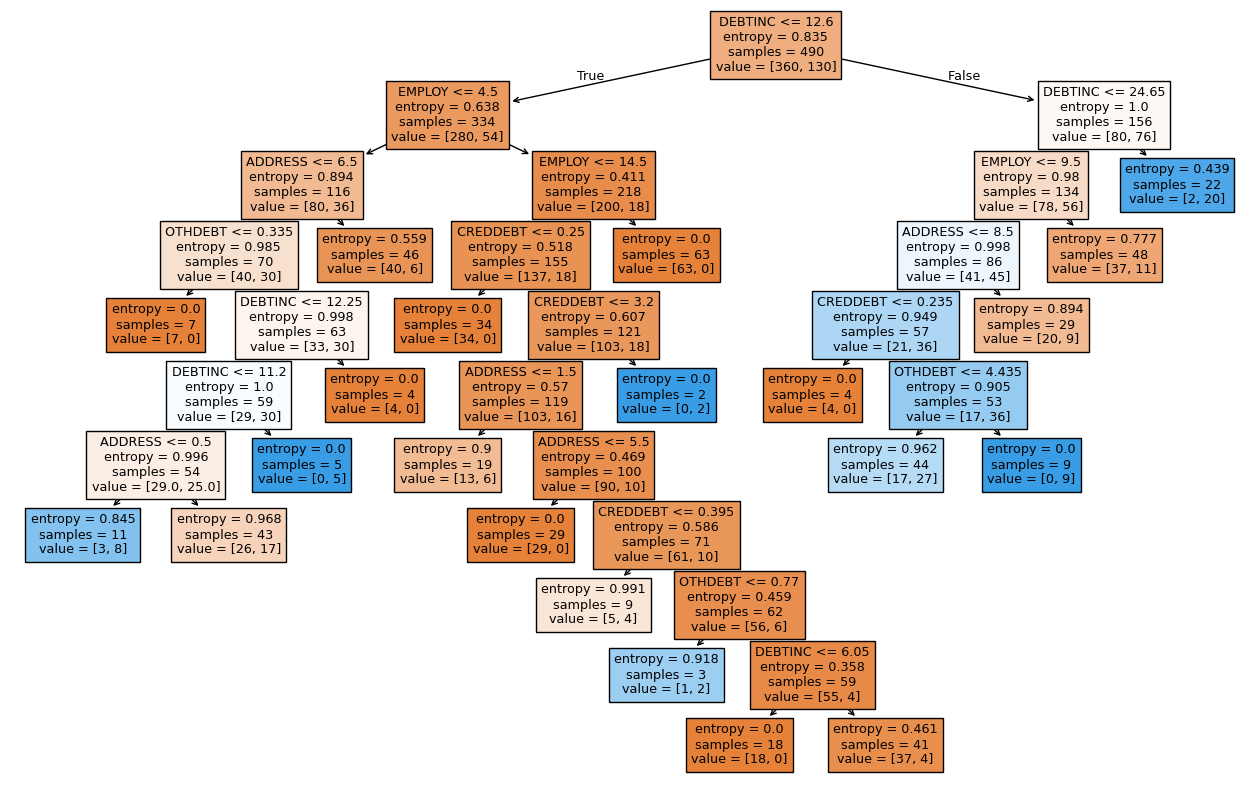

In [ ]:
#Plotting the tree
from sklearn.tree import plot_tree
plt.figure(figsize = (16,10))
plot_tree(dtcl_infgain, filled = True, feature_names = list(x_train.columns))
plt.show()

Observations:
*   The model has an AUC of 0.720, which indicates reasonable performance in distinguishing between defaulters and non-defaulters.With a cutoff of 0.3, the model achieves a recall of 0.736, meaning it correctly identifies about 73.6% of actual defaulters.
*   The precision at this cutoff is 0.438, suggesting that among those predicted as defaulters, about 43.8% are true defaulters.
*   The confusion matrix shows that the model correctly predicted 107 non-defaulters and 39 defaulters, while incorrectly predicting 50 non-defaulters as defaulters and 14 defaulters as non-defaulters.
*   The decision tree visualization shows the splits based on features like DEBTINC, EMPLOY, ADDRESS, CREDDEBT, and OTHDEBT, indicating their importance in predicting default.






Conclusion:
The Decision Tree model provides a reasonable starting point for predicting loan defaults. The chosen cutoff of 0.3 prioritizes identifying more defaulters (higher recall) at the expense of a lower precision. Further tuning of the model parameters and exploring other classification algorithms could potentially improve the model's performance. The key features identified in the decision tree can also be used to understand the factors influencing loan defaults.